In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

1. early stopping
2. data scaling
3. drop out
4. regularization
5. batch normalization
6. weight initialization
7. keras tunner(hyperparameter tuning)

# 1. Early Stopping

In [3]:
from sklearn.datasets import make_circles

In [4]:
X,y = make_circles(n_samples=250,noise=0.2,random_state=10)

In [5]:
X

array([[-1.24012692e+00,  4.10199815e-01],
       [ 1.36665289e+00, -1.26193513e-01],
       [-9.59759481e-01,  1.70443543e-01],
       [-5.47807915e-02,  1.02231120e+00],
       [ 8.79839462e-01, -1.19076837e+00],
       [ 8.25040216e-01, -1.80582935e-02],
       [-5.47719301e-01, -3.34604783e-01],
       [-2.67025157e-01, -8.90196938e-01],
       [ 1.51151983e-04, -5.00114889e-01],
       [-8.07543598e-01,  7.73887309e-01],
       [-3.89796889e-01,  1.09126421e+00],
       [-9.55515993e-01,  6.74314747e-02],
       [ 6.66387258e-01, -3.18492233e-01],
       [ 1.63109871e-01, -9.58736495e-01],
       [ 1.00009625e-01,  5.56474269e-01],
       [ 4.12830274e-01, -7.90894903e-01],
       [-1.09785335e+00, -2.42920076e-01],
       [ 5.76200038e-01,  5.27486536e-01],
       [-5.46298151e-01, -9.60082451e-01],
       [-5.93244277e-01, -1.10380410e+00],
       [-1.30484243e+00,  2.82199896e-01],
       [ 5.36893890e-01, -5.12805818e-01],
       [ 5.66872703e-01,  7.31434428e-01],
       [ 6.

In [6]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0])

<Axes: >

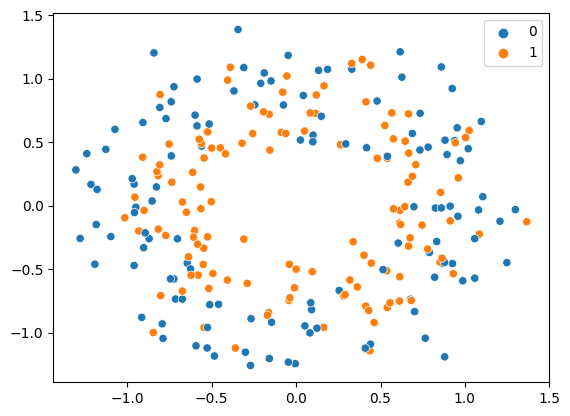

In [7]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [9]:
X_train.shape, X_test.shape

((200, 2), (50, 2))

In [10]:
y_train.shape, y_test.shape

((200,), (50,))

In [11]:
model = Sequential()

In [12]:
model.add(Dense(200,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
#model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=2)

In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
7/7 - 0s - loss: 0.4825 - accuracy: 0.7800 - val_loss: 0.7959 - val_accuracy: 0.6200 - 53ms/epoch - 8ms/step
Epoch 502/3000
7/7 - 0s - loss: 0.4771 - accuracy: 0.7800 - val_loss: 0.7927 - val_accuracy: 0.6200 - 65ms/epoch - 9ms/step
Epoch 503/3000
7/7 - 0s - loss: 0.4764 - accuracy: 0.7750 - val_loss: 0.7935 - val_accuracy: 0.6200 - 67ms/epoch - 10ms/step
Epoch 504/3000
7/7 - 0s - loss: 0.4759 - accuracy: 0.7700 - val_loss: 0.7957 - val_accuracy: 0.6000 - 52ms/epoch - 7ms/step
Epoch 505/3000
7/7 - 0s - loss: 0.4767 - accuracy: 0.7750 - val_loss: 0.7927 - val_accuracy: 0.6200 - 63ms/epoch - 9ms/step
Epoch 506/3000
7/7 - 0s - loss: 0.4772 - accuracy: 0.7650 - val_loss: 0.7960 - val_accuracy: 0.6200 - 66ms/epoch - 9ms/step
Epoch 507/3000
7/7 - 0s - loss: 0.4750 - accuracy: 0.7650 - val_loss: 0.7964 - val_accuracy: 0.6200 - 67ms/epoch - 10ms/step
Epoch 508/3000
7/7 - 0s - loss: 0.4758 - accuracy: 0.7650 - val_loss: 0.7968 - 

In [15]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=0)

In [16]:
history.history['loss']

[0.6898473501205444,
 0.6859721541404724,
 0.6844771504402161,
 0.683071494102478,
 0.681078314781189,
 0.6792434453964233,
 0.6774260997772217,
 0.6764643788337708,
 0.6757731437683105,
 0.6751542687416077,
 0.6741002798080444,
 0.6726629137992859,
 0.6717098951339722,
 0.6711692214012146,
 0.6697942614555359,
 0.6685817837715149,
 0.6672794222831726,
 0.6664411425590515,
 0.6649360656738281,
 0.6641605496406555,
 0.6626178026199341,
 0.6618862748146057,
 0.66096031665802,
 0.6595561504364014,
 0.6581975817680359,
 0.6568353772163391,
 0.655518114566803,
 0.6541290879249573,
 0.6529390811920166,
 0.6514198184013367,
 0.6500704884529114,
 0.6488733887672424,
 0.6467211246490479,
 0.6456791758537292,
 0.64374178647995,
 0.6421544551849365,
 0.6409634947776794,
 0.6392557621002197,
 0.6382017731666565,
 0.636420726776123,
 0.6347059011459351,
 0.6333028674125671,
 0.6317325830459595,
 0.6302568912506104,
 0.6282128095626831,
 0.6266565918922424,
 0.6254908442497253,
 0.6239701509475708,


In [17]:
history.history['val_loss']

[0.7017335295677185,
 0.7032274603843689,
 0.7029070258140564,
 0.7048495411872864,
 0.7071079015731812,
 0.7115724086761475,
 0.7160108685493469,
 0.7198593616485596,
 0.7229225039482117,
 0.724718451499939,
 0.7210568189620972,
 0.7192308306694031,
 0.7199732065200806,
 0.7173905968666077,
 0.7162817120552063,
 0.7127091288566589,
 0.7106925845146179,
 0.7106216549873352,
 0.7111429572105408,
 0.7114648222923279,
 0.7089844346046448,
 0.705776035785675,
 0.7038401961326599,
 0.7053252458572388,
 0.7068675756454468,
 0.706522524356842,
 0.7058973908424377,
 0.7038758993148804,
 0.7036021947860718,
 0.701335608959198,
 0.7013029456138611,
 0.6986967325210571,
 0.6961914300918579,
 0.6963979601860046,
 0.6935969591140747,
 0.6924358606338501,
 0.6940380334854126,
 0.693194568157196,
 0.6934781074523926,
 0.6893517971038818,
 0.6878329515457153,
 0.6917809247970581,
 0.6936846971511841,
 0.6907667517662048,
 0.6918110847473145,
 0.6883918642997742,
 0.6880966424942017,
 0.680051565170288

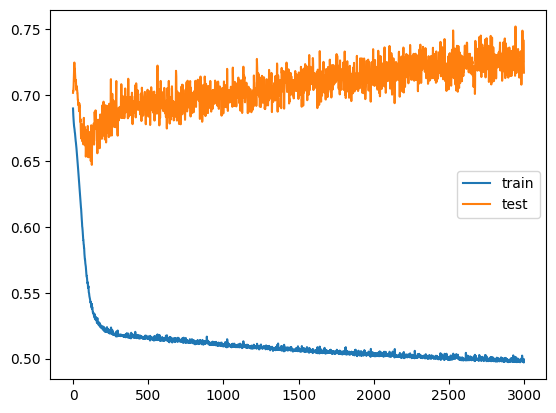

In [18]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [19]:
model1=Sequential()

model.add(Dense(200,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
callback = EarlyStopping(
    monitor='val_loss',
    mode='auto',
    baseline=None,
    patience=20
)

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
7/7 [==============================] - 3s 32ms/step - loss: 0.6960 - accuracy: 0.3950 - val_loss: 0.6895 - val_accuracy: 0.6000
Epoch 2/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.5050 - val_loss: 0.6833 - val_accuracy: 0.6400
Epoch 3/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.6814 - accuracy: 0.6300 - val_loss: 0.6803 - val_accuracy: 0.6200
Epoch 4/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.6753 - accuracy: 0.6700 - val_loss: 0.6749 - val_accuracy: 0.6600
Epoch 5/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.6684 - accuracy: 0.6600 - val_loss: 0.6702 - val_accuracy: 0.6400
Epoch 6/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.6623 - accuracy: 0.6850 - val_loss: 0.6675 - val_accuracy: 0.6600
Epoch 7/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.6572 - accuracy: 0.6800 - val_loss: 0.6627 - val_accuracy: 0.6200
Epoch 8/3000
7/

In [27]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    mode='auto',
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=30
)

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
7/7 [==============================] - 0s 23ms/step - loss: 0.4084 - accuracy: 0.8250 - val_loss: 0.9584 - val_accuracy: 0.6400
Epoch 2/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.3958 - accuracy: 0.8300 - val_loss: 0.9656 - val_accuracy: 0.6600
Epoch 3/3000
7/7 [==============================] - 0s 15ms/step - loss: 0.3844 - accuracy: 0.8450 - val_loss: 0.9747 - val_accuracy: 0.6800
Epoch 4/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.4037 - accuracy: 0.8350 - val_loss: 0.9854 - val_accuracy: 0.6600
Epoch 5/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.3934 - accuracy: 0.8500 - val_loss: 0.9793 - val_accuracy: 0.6600
Epoch 6/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.3865 - accuracy: 0.8450 - val_loss: 0.9922 - val_accuracy: 0.5800
Epoch 7/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.3948 - accuracy: 0.8350 - val_loss: 0.9873 - val_accuracy: 0.6600
Epoch 8/3000
7/

In [29]:
callback = EarlyStopping(
    monitor='accuracy',
    min_delta=0.00001,
    mode='auto',
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=30
)

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
7/7 [==============================] - 0s 13ms/step - loss: 0.3843 - accuracy: 0.8450 - val_loss: 1.0017 - val_accuracy: 0.6600
Epoch 2/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.3887 - accuracy: 0.8400 - val_loss: 0.9766 - val_accuracy: 0.6600
Epoch 3/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.3919 - accuracy: 0.8300 - val_loss: 0.9893 - val_accuracy: 0.6600
Epoch 4/3000
7/7 [==============================] - 0s 9ms/step - loss: 0.3973 - accuracy: 0.8500 - val_loss: 0.9804 - val_accuracy: 0.6600
Epoch 5/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.3926 - accuracy: 0.8350 - val_loss: 0.9972 - val_accuracy: 0.6600
Epoch 6/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.4011 - accuracy: 0.8350 - val_loss: 0.9894 - val_accuracy: 0.6600
Epoch 7/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.3901 - accuracy: 0.8400 - val_loss: 0.9771 - val_accuracy: 0.6600
Epoch 8/3000
7/7

# Normalization

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/pappumahato/try_deep_learning/main/datasets/Social_Network_Ads.csv')

In [5]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0


In [6]:
df = df.iloc[:,2:]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

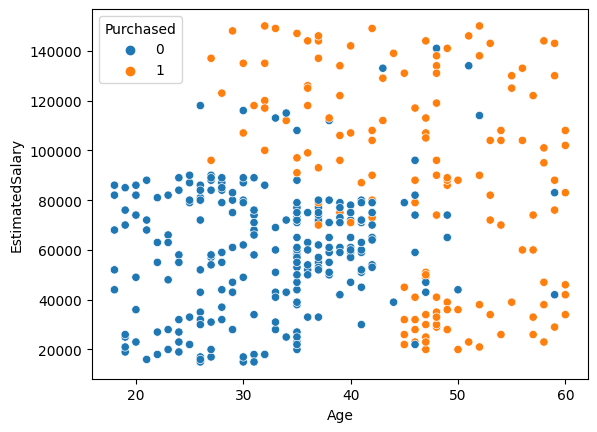

In [8]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])

In [9]:
df.shape

(400, 3)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [13]:
X_test.shape, y_test.shape

((80, 2), (80,))

In [14]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [15]:
# Here you will get trainable params
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=2)

Epoch 1/100
10/10 - 0s - loss: 36.5264 - accuracy: 0.5281 - val_loss: 15.2322 - val_accuracy: 0.4000 - 98ms/epoch - 10ms/step
Epoch 2/100
10/10 - 0s - loss: 41.6047 - accuracy: 0.4656 - val_loss: 20.6228 - val_accuracy: 0.4000 - 53ms/epoch - 5ms/step
Epoch 3/100
10/10 - 0s - loss: 81.3558 - accuracy: 0.5156 - val_loss: 45.0208 - val_accuracy: 0.6000 - 56ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 39.3292 - accuracy: 0.5781 - val_loss: 16.9109 - val_accuracy: 0.4000 - 62ms/epoch - 6ms/step
Epoch 5/100
10/10 - 0s - loss: 20.2620 - accuracy: 0.5344 - val_loss: 38.9788 - val_accuracy: 0.4000 - 50ms/epoch - 5ms/step
Epoch 6/100
10/10 - 0s - loss: 27.0179 - accuracy: 0.4906 - val_loss: 28.9786 - val_accuracy: 0.6000 - 49ms/epoch - 5ms/step
Epoch 7/100
10/10 - 0s - loss: 23.4933 - accuracy: 0.5406 - val_loss: 24.3513 - val_accuracy: 0.4000 - 61ms/epoch - 6ms/step
Epoch 8/100
10/10 - 0s - loss: 35.9089 - accuracy: 0.5156 - val_loss: 99.8561 - val_accuracy: 0.4000 - 62ms/epoch - 6ms/step

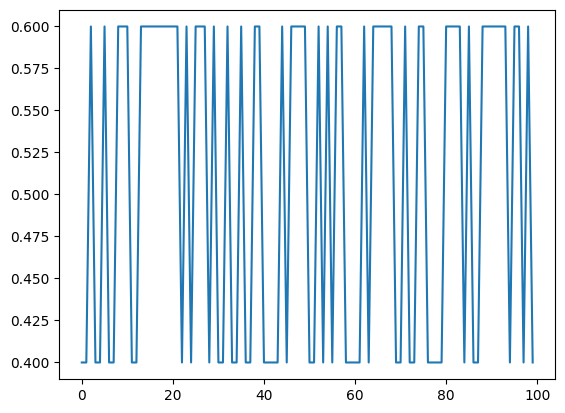

In [20]:
plt.plot(history.history['val_accuracy'])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

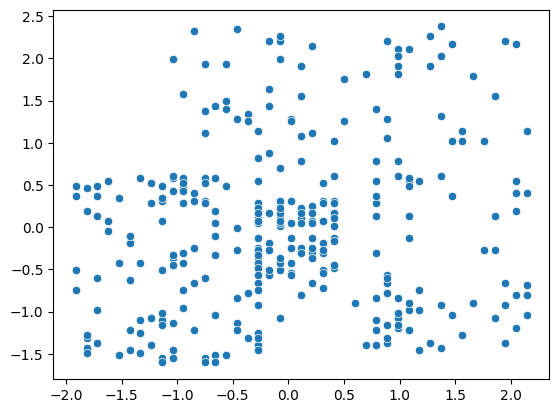

In [24]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [25]:
history = model1.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=2)

Epoch 1/100
10/10 - 0s - loss: 0.7322 - accuracy: 0.6531 - val_loss: 0.7289 - val_accuracy: 0.6000 - 467ms/epoch - 47ms/step
Epoch 2/100
10/10 - 0s - loss: 0.6107 - accuracy: 0.6844 - val_loss: 0.5915 - val_accuracy: 0.6250 - 88ms/epoch - 9ms/step
Epoch 3/100
10/10 - 0s - loss: 0.4924 - accuracy: 0.7531 - val_loss: 0.4546 - val_accuracy: 0.8000 - 91ms/epoch - 9ms/step
Epoch 4/100
10/10 - 0s - loss: 0.3980 - accuracy: 0.8125 - val_loss: 0.3757 - val_accuracy: 0.8250 - 95ms/epoch - 9ms/step
Epoch 5/100
10/10 - 0s - loss: 0.3503 - accuracy: 0.8375 - val_loss: 0.3479 - val_accuracy: 0.8000 - 96ms/epoch - 10ms/step
Epoch 6/100
10/10 - 0s - loss: 0.3264 - accuracy: 0.8625 - val_loss: 0.3322 - val_accuracy: 0.8375 - 90ms/epoch - 9ms/step
Epoch 7/100
10/10 - 0s - loss: 0.3123 - accuracy: 0.8719 - val_loss: 0.3344 - val_accuracy: 0.8250 - 88ms/epoch - 9ms/step
Epoch 8/100
10/10 - 0s - loss: 0.3058 - accuracy: 0.8719 - val_loss: 0.3317 - val_accuracy: 0.8250 - 97ms/epoch - 10ms/step
Epoch 9/100


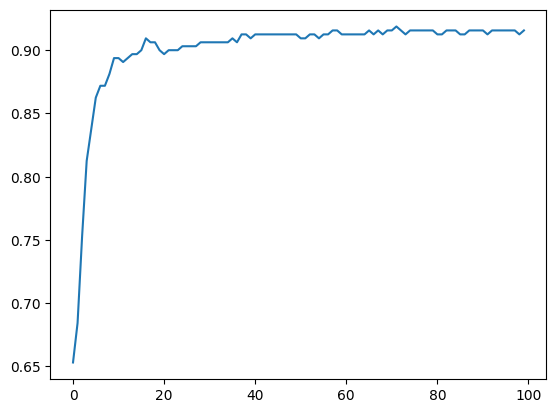

In [28]:
plt.plot(history.history['accuracy'])

In [30]:
callback = EarlyStopping(
    monitor='accuracy',
    min_delta=0.0001,
    mode='auto',
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=30
)

In [31]:
history=model1.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=2,callbacks=callback)

Epoch 1/100
10/10 - 0s - loss: 0.2231 - accuracy: 0.9156 - val_loss: 0.2578 - val_accuracy: 0.9125 - 140ms/epoch - 14ms/step
Epoch 2/100
10/10 - 0s - loss: 0.2240 - accuracy: 0.9156 - val_loss: 0.2619 - val_accuracy: 0.9125 - 84ms/epoch - 8ms/step
Epoch 3/100
10/10 - 0s - loss: 0.2231 - accuracy: 0.9125 - val_loss: 0.2580 - val_accuracy: 0.9125 - 90ms/epoch - 9ms/step
Epoch 4/100
10/10 - 0s - loss: 0.2229 - accuracy: 0.9156 - val_loss: 0.2578 - val_accuracy: 0.9125 - 89ms/epoch - 9ms/step
Epoch 5/100
10/10 - 0s - loss: 0.2233 - accuracy: 0.9156 - val_loss: 0.2589 - val_accuracy: 0.9125 - 92ms/epoch - 9ms/step
Epoch 6/100
10/10 - 0s - loss: 0.2230 - accuracy: 0.9156 - val_loss: 0.2583 - val_accuracy: 0.9125 - 90ms/epoch - 9ms/step
Epoch 7/100
10/10 - 0s - loss: 0.2229 - accuracy: 0.9156 - val_loss: 0.2579 - val_accuracy: 0.9125 - 116ms/epoch - 12ms/step
Epoch 8/100
10/10 - 0s - loss: 0.2227 - accuracy: 0.9156 - val_loss: 0.2587 - val_accuracy: 0.9125 - 69ms/epoch - 7ms/step
Epoch 9/100


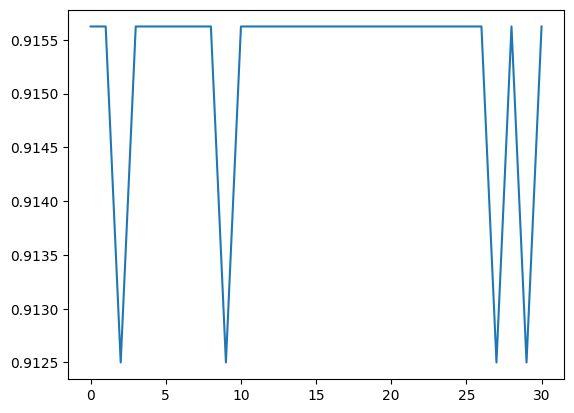

In [32]:
plt.plot(history.history['accuracy'])